## 기본 세팅

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2
from sklearn.metrics import accuracy_score, confusion_matrix

# 모델 저장 라이브러리
import joblib

# pandas 데이터프레임 전체보기(column)
pd.set_option('display.max_columns',None)

# 데이터 불러오기
data = pd.read_csv('/content/drive/MyDrive/data01_train.csv')
features = pd.read_csv('/content/drive/MyDrive/features.csv')

## 데이터 분석
#### 기본정보 확인

In [ ]:
data.tail()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-energy()-X,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,"tGravityAcc-arCoeff()-X,1","tGravityAcc-arCoeff()-X,2","tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-X,4","tGravityAcc-arCoeff()-Y,1","tGravityAcc-arCoeff()-Y,2","tGravityAcc-arCoeff()-Y,3","tGravityAcc-arCoeff()-Y,4","tGravityAcc-arCoeff()-Z,1","tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4","tGravityAcc-correlation()-X,Y","tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,tBodyAccJerk-mean()-Z,tBodyAccJerk-std()-X,tBodyAccJerk-std()-Y,tBodyAccJerk-std()-Z,tBodyAccJerk-mad()-X,tBodyAccJerk-mad()-Y,tBodyAccJerk-mad()-Z,tBodyAccJerk-max()-X,tBodyAccJerk-max()-Y,tBodyAccJerk-max()-Z,tBodyAccJerk-min()-X,tBodyAccJerk-min()-Y,tBodyAccJerk-min()-Z,tBodyAccJerk-sma(),tBodyAccJerk-energy()-X,tBodyAccJerk-energy()-Y,tBodyAccJerk-energy()-Z,tBodyAccJerk-iqr()-X,tBodyAccJerk-iqr()-Y,tBodyAccJerk-iqr()-Z,tBodyAccJerk-entropy()-X,tBodyAccJerk-entropy()-Y,tBodyAccJerk-entropy()-Z,"tBodyAccJerk-arCoeff()-X,1","tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-X,3","tBodyAccJerk-arCoeff()-X,4","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,2","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Y,4","tBodyAccJerk-arCoeff()-Z,1","tBodyAccJerk-arCoeff()-Z,2","tBodyAccJerk-arCoeff()-Z,3","tBodyAccJerk-arCoeff()-Z,4","tBodyAccJerk-correlation()-X,Y","tBodyAccJerk-correlation()-X,Z","tBodyAccJerk-correlation()-Y,Z",tBodyGyro-mean()-X,tBodyGyro-mean()-Y,tBodyGyro-mean()-Z,tBodyGyro-std()-X,tBodyGyro-std()-Y,tBodyGyro-std()-Z,tBodyGyro-mad()-X,tBodyGyro-mad()-Y,tBodyGyro-mad()-Z,tBodyGyro-max()-X,tBodyGyro-max()-Y,tBodyGyro-max()-Z,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-Z,tBodyGyro-sma(),tBodyGyro-energy()-X,tBodyGyro-energy()-Y,tBodyGyro-energy()-Z,tBodyGyro-iqr()-X,tBodyGyro-iqr()-Y,tBodyGyro-iqr()-Z,tBodyGyro-entropy()-X,tBodyGyro-entropy()-Y,tBodyGyro-entropy()-Z,"tBodyGyro-arCoeff()-X,1","tBodyGyro-arCoeff()-X,2","tBodyGyro-arCoeff()-X,3","tBodyGyro-arCoeff()-X,4","tBodyGyro-arCoeff()-Y,1","tBodyGyro-arCoeff()-Y,2","tBodyGyro-arCoeff()-Y,3","tBodyGyro-arCoeff()-Y,4","tBodyGyro-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,2","tBodyGyro-arCoeff()-Z,3","tBodyGyro-arCoeff()-Z,4","tBodyGyro-correlation()-X,Y","tBodyGyro-correlation()-X,Z","tBodyGyro-correlation()-Y,Z",tBodyGyroJerk-mean()-X,tBodyGyroJerk-mean()-Y,tBodyGyroJerk-mean()-Z,tBodyGyroJerk-std()-X,tBodyGyroJerk-std()-Y,tBodyGyroJerk-std()-Z,tBodyGyroJerk-mad()-X,tBodyGyroJerk-mad()-Y,tBodyGyroJerk-mad()-Z,tBodyGyroJerk-max()-X,tBodyGyroJerk-max()-Y,tBodyGyroJerk-max()-Z,tBodyGyroJerk-min()-X,tBodyGyroJerk-min()-Y,tBodyGyroJerk-min()-Z,tBodyGyroJ

In [ ]:
features.tail()

,sensor,agg,axis,feature_name
556,angle,tBodyGyroMean,gravityMean,"angle(tBodyGyroMean,gravityMean)"
557,angle,tBodyGyroJerkMean,gravityMean,"angle(tBodyGyroJerkMean,gravityMean)"
558,angle,X,gravityMean,"angle(X,gravityMean)"
559,angle,Y,gravityMean,"angle(Y,gravityMean)"
560,angle,Z,gravityMean,"angle(Z,gravityMean)"


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5881 entries, 0 to 5880
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 25.3+ MB


In [ ]:
# features.axis에서 결측값 확인
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sensor        561 non-null    object
 1   agg           561 non-null    object
 2   axis          436 non-null    object
 3   feature_name  561 non-null    object
dtypes: object(4)
memory usage: 17.7+ KB


### Target인 data.Activity 확인

In [ ]:
target='Activity'
bar_x = []
for i in data[target].value_counts():
    bar_x.append(i)
bar_y = list(data[target].unique())

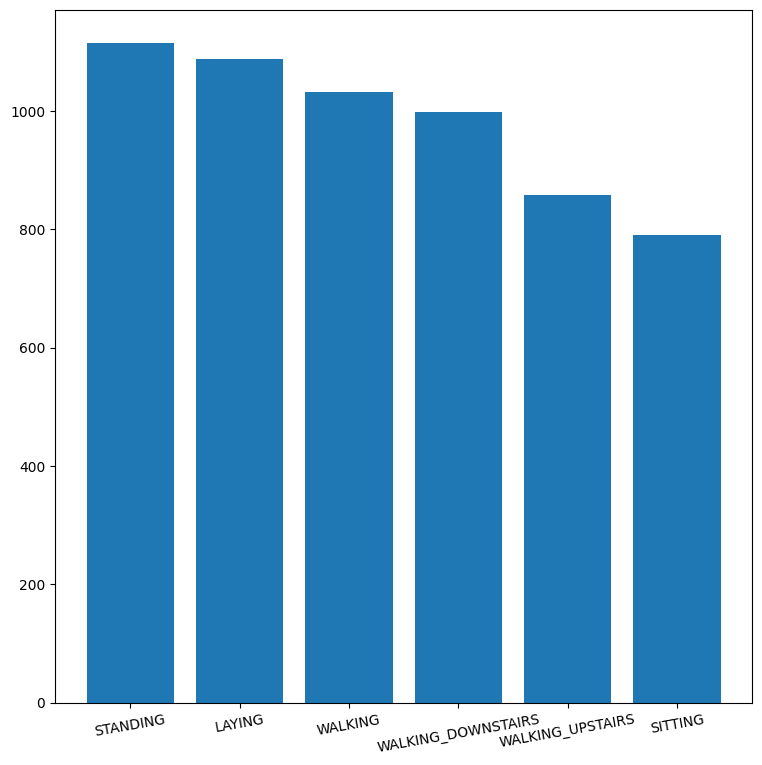

In [ ]:
plt.figure(figsize=(9,9))
plt.bar(bar_y,bar_x)
plt.xticks(rotation=10)
plt.show()

### features의 각 변수의 분포 확인

In [ ]:
# 먼저 axis에 결측치가 있어 제거 후 확인
features.axis.isna().sum()

125

In [ ]:
features = features.dropna()
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 436 entries, 0 to 560
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sensor        436 non-null    object
 1   agg           436 non-null    object
 2   axis          436 non-null    object
 3   feature_name  436 non-null    object
dtypes: object(4)
memory usage: 17.0+ KB


In [ ]:
# 함수 만들기
def features_plot(column):
    num = features[column].value_counts(sort=False)
    name = features[column].unique()
    plt.figure(figsize=(7,7))
    plt.bar(name,num)
    plt.xticks(rotation=45)
    plt.show()
    print(features[column].value_counts())

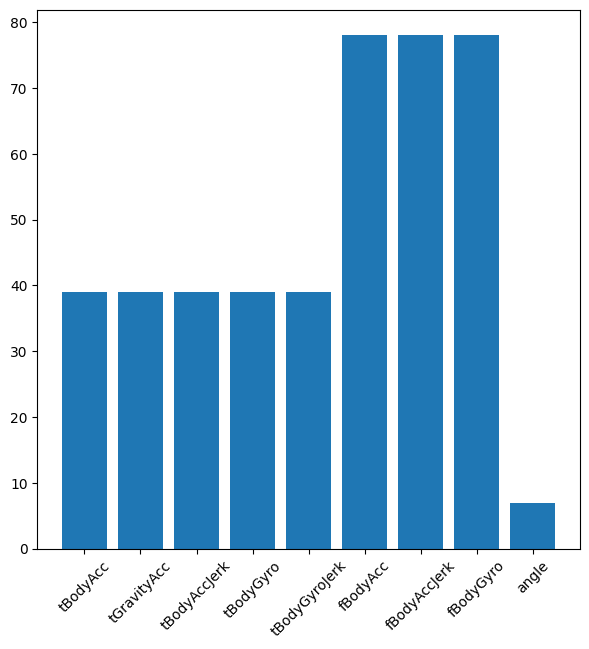

fBodyAcc         78
fBodyAccJerk     78
fBodyGyro        78
tBodyAcc         39
tGravityAcc      39
tBodyAccJerk     39
tBodyGyro        39
tBodyGyroJerk    39
angle             7
Name: sensor, dtype: int64


In [ ]:
# sensor 확인
features_plot("sensor")

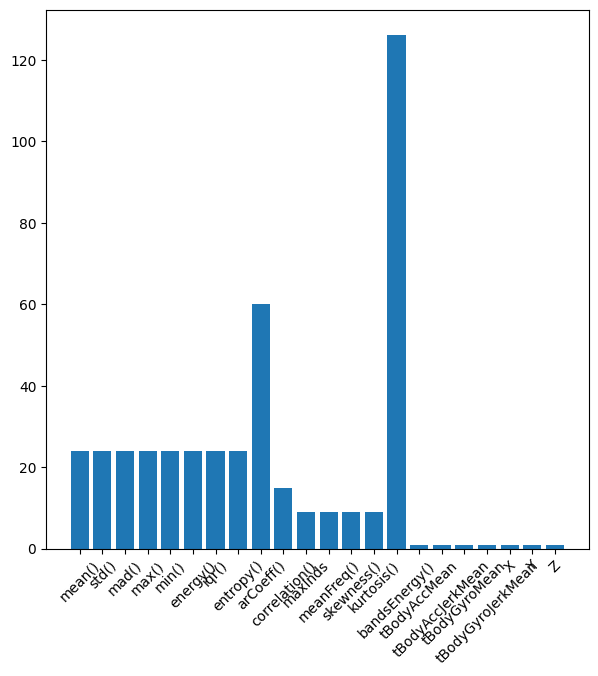

bandsEnergy()        126
arCoeff()             60
mean()                24
mad()                 24
max()                 24
min()                 24
energy()              24
iqr()                 24
entropy()             24
std()                 24
correlation()         15
kurtosis()             9
meanFreq()             9
skewness()             9
maxInds                9
tBodyAccMean           1
tBodyAccJerkMean       1
tBodyGyroMean          1
tBodyGyroJerkMean      1
X                      1
Y                      1
Z                      1
Name: agg, dtype: int64


In [ ]:
# agg확인
features_plot("agg")

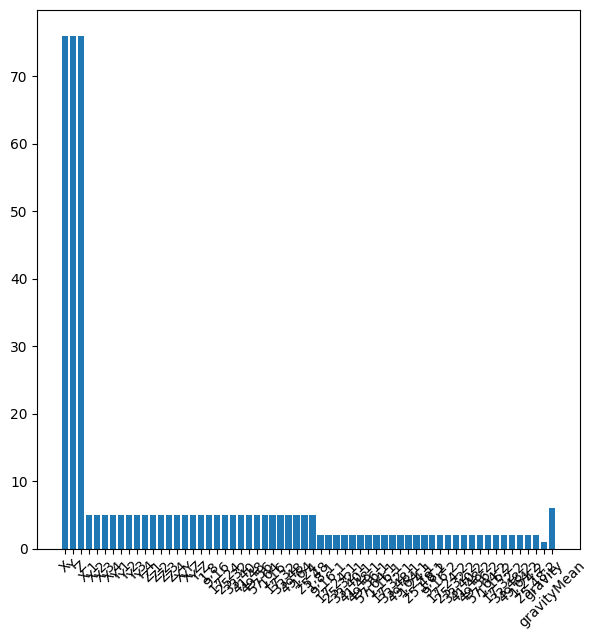

X              76
Y              76
Z              76
gravityMean     6
X,2             5
               ..
25,32.1         2
17,24.1         2
1,8.1           2
9,16.1          2
gravity         1
Name: axis, Length: 62, dtype: int64


In [ ]:
# axis 확인
features_plot("axis")

## 데이터 분석
### data의 column의 개수가 563개로 단변량분석/이변량 분석하기엔 너무 많음
### pycaret으로 가장 성능이 좋은 알고리즘을 찾은 후 변수 중요도 확인(accuracy기준)

In [ ]:
# pycaret 설치
!pip install pycaret

In [30]:
# 데이터 불러오기
data = pd.read_csv("/content/drive/MyDrive/data01_train.csv")
target = "Activity"

In [31]:
# 타겟 = Activity, 6가지 행동으로 나뉘어 있음
data.Activity

0                 STANDING
1                   LAYING
2                 STANDING
3                  WALKING
4       WALKING_DOWNSTAIRS
               ...        
5876               SITTING
5877      WALKING_UPSTAIRS
5878                LAYING
5879      WALKING_UPSTAIRS
5880               SITTING
Name: Activity, Length: 5881, dtype: object

In [6]:
# 결측치 제거
data = data.dropna()

In [33]:
# 라벨링(타겟을 수치형으로)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(data.Activity)
data.Activity = encoder.transform(data.Activity)
data.Activity

0       2
1       0
2       2
3       3
4       4
       ..
5876    1
5877    5
5878    0
5879    5
5880    1
Name: Activity, Length: 5881, dtype: int64

In [ ]:
# pycaret 선언
from pycaret.classification import *
exp_clf = setup(data = data, target = target, session_id=42)

,Description,Value
0,Session id,42
1,Target,Activity
2,Target type,Multiclass
3,Target mapping,"LAYING: 0, SITTING: 1, STANDING: 2, WALKING: 3, WALKING_DOWNSTAIRS: 4, WALKING_UPSTAIRS: 5"
4,Original data shape,"(5881, 563)"
5,Transformed data shape,"(5881, 563)"
6,Transformed train set shape,"(4116, 563)"
7,Transformed test set shape,"(1765, 563)"
8,Numeric features,562
9,Preprocess,True


In [ ]:
# pycaret의 accuracy기준으로 모델 성능 평가
best_models = compare_models(sort='acc', n_select=5, fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9896,0.9998,0.9896,0.9896,0.9896,0.9874,0.9874,74.9440
xgboost,Extreme Gradient Boosting,0.9876,0.9998,0.9876,0.9877,0.9876,0.9851,0.9851,42.2280
gbc,Gradient Boosting Classifier,0.9825,0.9996,0.9825,0.9827,0.9825,0.9789,0.9790,246.8240
et,Extra Trees Classifier,0.9818,0.9995,0.9818,0.9819,0.9818,0.9781,0.9781,0.8900
lr,Logistic Regression,0.9798,0.9991,0.9798,0.9799,0.9798,0.9757,0.9758,6.7640
lda,Linear Discriminant Analysis,0.9772,0.9988,0.9772,0.9772,0.9771,0.9725,0.9725,1.0440
ridge,Ridge Classifier,0.9752,0.0000,0.9752,0.9753,0.9752,0.9702,0.9702,0.1120
rf,Random Forest Classifier,0.9740,0.9993,0.9740,0.9741,0.9740,0.9687,0.9687,3.1620
knn,K Neighbors Classifier,0.9558,0.9940,0.9558,0.9568,0.9556,0.9468,0.9471,0.4100
svm,SVM - Linear Kernel,0.9553,0.0000,0.9553,0.9607,0.9544,0.9462,0.9477,0.3640


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [ ]:
# pycaret의 모델 만들기
lgb = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9951,1.0000,0.9951,0.9952,0.9951,0.9942,0.9942
1,0.9879,0.9998,0.9879,0.9879,0.9879,0.9854,0.9854
2,0.9879,0.9996,0.9879,0.9879,0.9879,0.9854,0.9854
3,0.9976,1.0000,0.9976,0.9976,0.9976,0.9971,0.9971
4,0.9903,0.9997,0.9903,0.9904,0.9903,0.9883,0.9883
5,0.9903,0.9998,0.9903,0.9904,0.9903,0.9883,0.9883
6,0.9927,0.9999,0.9927,0.9927,0.9927,0.9912,0.9912
7,0.9927,0.9999,0.9927,0.9927,0.9927,0.9912,0.9912
8,0.9927,0.9999,0.9927,0.9927,0.9927,0.9912,0.9912


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# pycaret의 자동 파라미터 튜닝
tuned_lgb = tune_model(lgb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9927,1.0000,0.9927,0.9928,0.9927,0.9912,0.9912
1,0.9830,0.9998,0.9830,0.9830,0.9830,0.9796,0.9796
2,0.9903,0.9998,0.9903,0.9904,0.9903,0.9883,0.9883
3,0.9854,0.9997,0.9854,0.9859,0.9854,0.9825,0.9826
4,0.9879,0.9994,0.9879,0.9879,0.9879,0.9854,0.9854
5,0.9903,0.9997,0.9903,0.9904,0.9903,0.9883,0.9883
6,0.9951,1.0000,0.9951,0.9951,0.9951,0.9941,0.9941
7,0.9903,0.9998,0.9903,0.9903,0.9903,0.9883,0.9883
8,0.9854,0.9998,0.9854,0.9855,0.9854,0.9824,0.9824


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
# 파라미터 적용결과 출력
tuned_lgb

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [34]:
# train_test_split을 이용해 데이터 나누기
x = data.drop(target, axis=1)
y = data.loc[:, target]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2, random_state=42)

In [ ]:
# 모델 저장
joblib.dump(tuned_lgb, '/content/drive/MyDrive/tuned_lgb.pkl')

['/content/drive/MyDrive/tuned_lgb.pkl']

In [12]:
# 모델 불러오기
tuned_lgb = joblib.load('/content/drive/MyDrive/tuned_lgb.pkl')

In [35]:
# 예측
y_pred = tuned_lgb.predict(x_test)

In [41]:
# 성능평가
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       231
           1       1.00      0.99      0.99       200
           2       0.99      1.00      1.00       226
           3       0.99      0.99      0.99       198
           4       1.00      0.99      1.00       145
           5       0.99      1.00      1.00       177

    accuracy                           1.00      1177
   macro avg       1.00      1.00      1.00      1177
weighted avg       1.00      1.00      1.00      1177

[[231   0   0   0   0   0]
 [  0 198   2   0   0   0]
 [  0   0 226   0   0   0]
 [  0   0   0 197   0   1]
 [  0   0   0   1 144   0]
 [  0   0   0   0   0 177]]
0.9966015293118097


## feature_importance 시각화

In [44]:
# feature_importance 시각화 함수 선언
def plot_feature_importance(importance, names, result_only = False, topn = 'all'):
    feature_importance = np.array(importance)
    feature_name = np.array(names)

    data={'feature_name':feature_name,'feature_importance':feature_importance}
    fi_temp = pd.DataFrame(data)

    #변수의 특성 중요도 순으로 정렬하기
    fi_temp.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_temp.reset_index(drop=True, inplace = True)

    if topn == 'all' :
        fi_df = fi_temp.copy()
    else :
        fi_df = fi_temp.iloc[:topn]

    #변수의 특성 중요도 그래프로 그리기
    if result_only == False :
        plt.figure(figsize=(8,8))
        sns.barplot(x='feature_importance', y='feature_name', data = fi_df)

        plt.xlabel('importance')
        plt.ylabel('feature name')
        plt.grid()

    return fi_temp

,feature_name,feature_importance
0,tGravityAcc-energy()-Y,441
1,tGravityAcc-min()-Y,348
2,tGravityAcc-mean()-Y,262
3,tGravityAcc-mean()-X,259
4,"tBodyGyro-correlation()-Y,Z",243
...,...,...
557,tGravityAccMag-energy(),0
558,tGravityAccMag-sma(),0
559,tGravityAccMag-min(),0
560,tGravityAccMag-max(),0


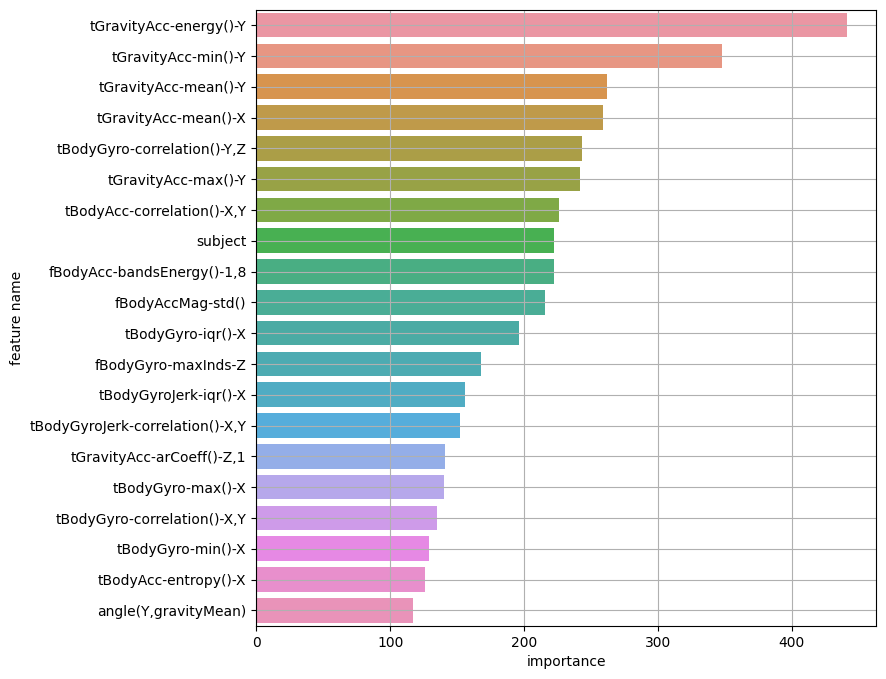

In [45]:
importance = tuned_lgb.feature_importances_
names = list(x)

# 변수 중요도 그래프 그리기
plot_feature_importance(importance, names, result_only = False, topn = 20)

## PermutationImportance를 이용해서 0이하인 column을 제외하고 학습해보자

In [ ]:
!pip install eli5

In [58]:
# 저장한 tuned_lgb모델을 PermutationImportance분석을 위해 불러오기
tuned_lgb_permutation = joblib.load('/content/drive/MyDrive/tuned_lgb.pkl')

In [ ]:
data.columns = data.columns.str.replace('[^a-zA-Z0-9]', '_', regex=True)

In [49]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(tuned_lgb_permutation, scoring = "accuracy", random_state = 42).fit(x_train, y_train)
eli5.show_weights(perm, top = 80, feature_names = x_train.columns.tolist())

Weight,Feature
0.3065 ± 0.0105,tGravityAcc-mean()-X
0.0045 ± 0.0010,"fBodyAcc-bandsEnergy()-1,8"
0.0023 ± 0.0011,tGravityAcc-energy()-Y
0.0020 ± 0.0004,subject
0.0018 ± 0.0006,tGravityAcc-min()-Y
0.0017 ± 0.0009,tGravityAcc-max()-Y
0.0017 ± 0.0004,tGravityAcc-mean()-Y
0.0012 ± 0.0006,fBodyGyro-maxInds-Z
0.0008 ± 0.0005,tBodyGyro-energy()-Z
0.0007 ± 0.0011,tBodyGyro-iqr()-X


In [55]:
# lgb_classification은 column제목에 특수문자가 있으면 학습이 안되기 때문에 이름 변경
x_train.columns = x_train.columns.str.replace('[^a-zA-Z0-9]', '_', regex=True)
x_test.columns = x_test.columns.str.replace('[^a-zA-Z0-9]', '_', regex=True)

In [57]:
mask = perm.feature_importances_ > 0.001
features = x_train.columns[mask]
x_train_perm = x_train[features]
x_test_perm = x_test[features]

tuned_lgb_permutation.fit(x_train_perm, y_train);

print('검증 정확도: ', tuned_lgb_permutation.score(x_test_perm, y_test))

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013153 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1575
[LightGBM] [Info] Number of data points in the train set: 4704, number of used features: 8
[LightGBM] [Info] Start training from score -1.671711
[LightGBM] [Info] Start training from score -1.732336
[LightGBM] [Info] Start training from score -1.698074
[LightGBM] [Info] Start training from score -1.771557
[LightGBM] [Info] Start training from score -1.985369
[LightGBM] [Info] Start training from score -1.932606
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

## PermutationImportance적용 결과 0.9966에서0.9898로 성능이 떨어짐

In [63]:
x_train.shape, x_train_perm.shape

((4704, 562), (4704, 8))

## 기존 column개수는 562개에서 8개로 줄어들며 오히려 성능이 떨어진것같음
## accuracy 0.9966모델로 kaggle 제출

In [69]:
# kaggle 제출

def kaggle(file_name):
    df = pd.DataFrame(y_pred, columns=['Activity'])
    df.insert(0,'ID',range(len(df.Activity)))
    path = '/content/drive/MyDrive/'
    files = file_name+'.csv'
    df.to_csv(path+files, index=False)